

---


# **Prediction with ML models**
#### ***Correlation between after-hours twitter data and movement of individual company stock price on a daily basis***


---



**Final Project**
CSCI 49362/76000   |   Fall 2020 

##### Hannah Do, Andrew Lee, Phillip Chen







In [36]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import datetime, string, re
import sys, os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from collections import Counter

print('All Libraries Sucessfully Imported')

All Libraries Sucessfully Imported


In [37]:

companies = ['microsoft', 'facebook', 'google', 'amazon', 'apple']


---
**1. Importing saved csv files for each company**

In [56]:
# Create a function with many machine learning models 
def models(X_train, X_test, y_train, y_test):

    list1 = []
    
    #Use Logistic regression & Cross Validation with different parameters - commented out because algorithm did not converge
#     param_grid = {'penalty': ['l1', 'l2', 'elasticnet','none'], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 'dual':[bool, False], 'C':[0.001, 0.1, 1, 10, 100], 'max_iter':[1, 500, 10000]}
#     lr = LogisticRegression(multi_class='ovr')
#     lr = GridSearchCV(lr, param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
#     lr.fit(X_train, y_train)
#     params_optimal = lr.best_params_
#     log = LogisticRegression(multi_class='ovr', **params_optimal)
    
    log = LogisticRegression(multi_class='ovr')

    log.fit(X_train, y_train)
    y_pred=log.predict(X_test)

    logistic_acc=accuracy_score(y_test, y_pred)
    list1.append(logistic_acc)

    
    #Use KNeighbors & Cross Validation with different parameters - not adequate for our dataset
#     param_grid = {'n_neighbors': [3, 5, 10], 'p': [1, 5, 10, 100], 'weights': ["uniform", "distance"]}
#     knn = KNeighborsClassifier()
#     knn = GridSearchCV(knn, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)
#     knn.fit(X_train, y_train)
#     params_optimal = knn.best_params_
    
#     knn_optimal = KNeighborsClassifier(**params_optimal)
#     knn_optimal = KNeighborsClassifier()

#     knn_optimal.fit(X_train, y_train)
#     y_pred=knn_optimal.predict(X_test)

#     knn_acc=accuracy_score(y_test, y_pred)
#     list1.append(knn_acc)
    

    #Use SVC (RBF kernal)
    svc_rbf = SVC(kernel='rbf', random_state = 4)
    svc_rbf.fit(X_train, y_train)
    y_pred=svc_rbf.predict(X_test)

    svc_rbf_acc=accuracy_score(y_test, y_pred)
    list1.append(svc_rbf_acc)

    
    #Use GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    y_pred=gauss.predict(X_test)

    gauss_acc=accuracy_score(y_test, y_pred)
    list1.append(gauss_acc)

    
    #Use Decision Tree
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    y_pred=tree.predict(X_test)

    tree_acc=accuracy_score(y_test, y_pred)
    list1.append(tree_acc)


    #Use the RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    y_pred=forest.predict(X_test)

    forest_acc=accuracy_score(y_test, y_pred)
    list1.append(forest_acc)
 
    return list1

In [58]:
final_table = pd.DataFrame()

for f in companies:

    list0 = []
    
    temp = pd.read_csv(f + "_scaled.csv", index_col= None, header = None)

    temp = temp.drop([0], axis=1)
    # drop NaN column with index values

#     temp = temp.drop([0, 8, 9], axis=1)
    # dropping lowest importance features
#     temp = temp.drop([0, 3, 4], axis=1)
    # dropping NASDAQ for comparison

    temp.columns = temp.iloc[0]
    temp = temp[1:] 
    # make first row as column names

    y = temp['target']
    temp = temp.drop(f + ' stock', axis=1)
    X = temp.drop('target', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    list0 = models(X_train, X_test, y_train, y_test)
    
    final_table[f] = list0
    
final_table

,microsoft,facebook,google,amazon,apple
0,0.615385,0.615385,0.769231,0.769231,0.461538
1,0.615385,0.615385,0.769231,0.769231,0.615385
2,0.769231,0.846154,0.769231,0.615385,0.769231
3,0.923077,0.846154,0.769231,0.769231,0.923077
4,0.923077,0.846154,0.923077,0.769231,1.000000


In [59]:
ml_models = ['Logistic Regression','SVC-rbf', 'Gaussian NB', 'Decision Tree', 'Random Forest']
final_table.index = ml_models

final_table

,microsoft,facebook,google,amazon,apple
Logistic Regression,0.615385,0.615385,0.769231,0.769231,0.461538
SVC-rbf,0.615385,0.615385,0.769231,0.769231,0.615385
Gaussian NB,0.769231,0.846154,0.769231,0.615385,0.769231
Decision Tree,0.923077,0.846154,0.769231,0.769231,0.923077
Random Forest,0.923077,0.846154,0.923077,0.769231,1.000000


No handles with labels found to put in legend.


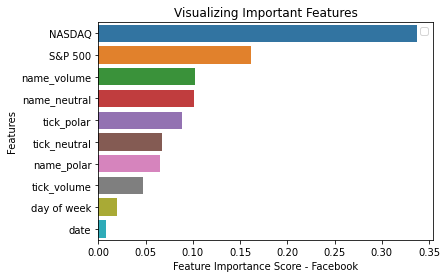

In [60]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)
# y_pred=forest.predict(X_test)

feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# selected_feat= X.columns[(sel.get_support())]


# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score - Facebook')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()